In [1]:
import pandas as pd


In [4]:
df=pd.read_csv("D:/IBA/sql/Data_set/golf.csv")

In [5]:
df

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [6]:
import numpy as np

In [20]:
print("Outlook:",sorted(df.Outlook.unique()))    
print("Temp:",sorted(df.Temp.unique()))
print("Humdity:",sorted(df.Humidity.unique()))
print("Windy:",sorted(df.Windy.unique()))
print("Play Golf:",sorted(df['Play Golf'].unique()))

Outlook: ['Overcast', 'Rainy', 'Sunny']
Temp: ['Cool', 'Hot', 'Mild']
Humdity: ['High', 'Normal']
Windy: [False, True]
Play Golf: ['No', 'Yes']


In [21]:
#Label Encoding
df[df.columns]=df[df.columns].apply (lambda col:pd.Categorical(col).codes).replace(-1,np.nan)
df

,Outlook,Temp,Humidity,Windy,Play Golf
0,1,1,0,0,0
1,1,1,0,1,0
2,0,1,0,0,1
3,2,2,0,0,1
4,2,0,1,0,1
5,2,0,1,1,0
6,0,0,1,1,1
7,1,2,0,0,0
8,1,0,1,0,1
9,2,2,1,0,1


In [23]:
feature_col=df.columns.drop('Play Golf')
feature_col

Index(['Outlook', 'Temp', 'Humidity', 'Windy'], dtype='object')

In [24]:
X=df[feature_col]
y=df['Play Golf']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=1)

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
clf=GaussianNB()

In [31]:
clf=clf.fit(X_train,y_train)
clf

GaussianNB()

In [32]:
y_pred=clf.predict(X_test)
test_data=pd.concat([X_test,y_test],axis=1)
test_data["Prediction"]=y_pred

In [33]:
test_data

,Outlook,Temp,Humidity,Windy,Play Golf,Prediction
3,2,2,0,0,1,0
7,1,2,0,0,0,0
6,0,0,1,1,1,1
2,0,1,0,0,1,1
10,1,2,1,1,1,0


In [36]:
#calculate accuracy
from sklearn import metrics

result=metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(result)

Confusion Matrix
[[1 0]
 [2 2]]


In [37]:
def plt1():
    import seaborn as sns;sns.set()
    c_mtrx=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['predicted'])
    sns.heatmap(c_mtrx,annot=True)


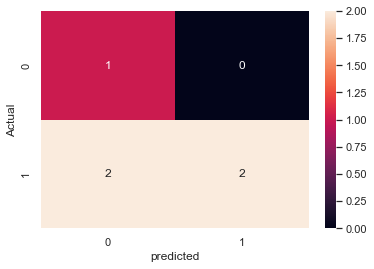

In [38]:
plt1()